<a href="https://colab.research.google.com/github/trailrun/ML_books/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
breast = pd.read_csv('/content/drive/MyDrive/ML_sample/breast-cancer.csv')

import numpy as np
from sklearn.model_selection import train_test_split
breast['diagnosis'] = np.where(breast['diagnosis']=='M', 1, 0)
features = ['area_mean', 'texture_mean']
X = breast[features]
y = breast['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
pred = clf.fit(x_train, y_train).predict(x_test)
print('정확도 : ', clf.score(x_test, y_test))

정확도 :  0.9005847953216374


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}'.format(round(test_acc*100, 2)))
print('정밀도\t{}'.format(round(test_prc*100, 2)))
print('재현율\t{}'.format(round(test_rcll*100, 2)))
print('F1\t{}'.format(round(test_f1*100, 2)))

[[102   5]
 [ 12  52]]


정확도	90.06
정밀도	91.23
재현율	81.25
F1	85.95


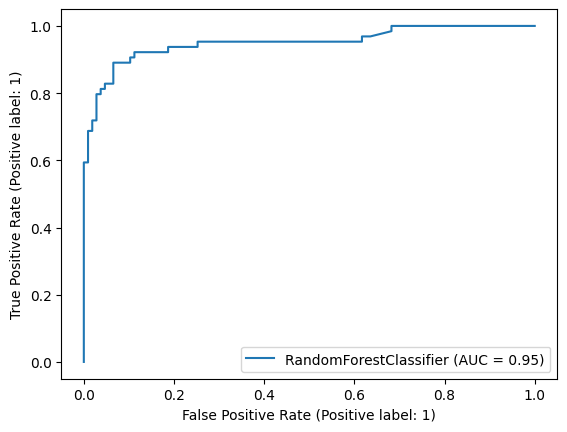

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

In [11]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,area_mean,0.721408
1,texture_mean,0.278592


<BarContainer object of 2 artists>

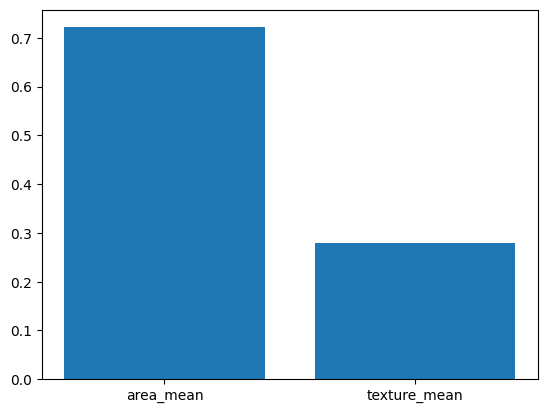

In [13]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)

In [22]:
car = pd.read_csv('/content/drive/MyDrive/ML_sample/CarPrice_Assignment.csv')
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X = car_num[features]
y = car_num['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(143, 13) (62, 13)
(143,) (62,)


In [23]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}'.format(round(acc,3)))

MSE	4102823.441
MAE	1329.547
RMSE	2025.543
ACC	0.932


In [27]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,boreratio,0.006142
1,carheight,0.003777
2,carlength,0.010245
3,carwidth,0.023218
4,citympg,0.003310
5,compressionratio,0.003489
6,curbweight,0.195725
7,enginesize,0.626129
8,highwaympg,0.067176
9,horsepower,0.037106


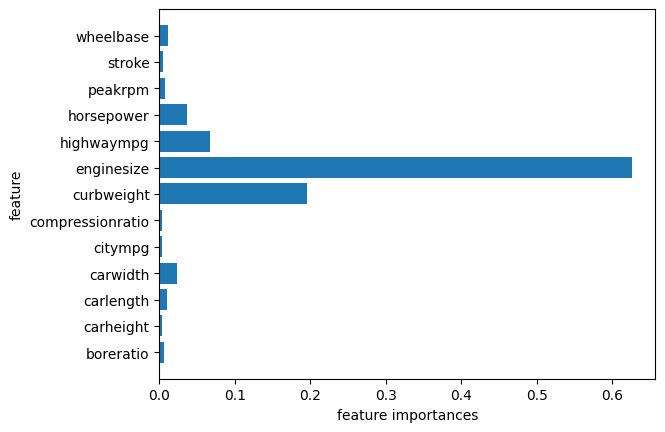

In [30]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()